### Step 1 (Windows) Load data into data frame

In [2]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox


file = tk.Tk()
file.withdraw()

file_path = filedialog.askopenfilename(
    title="Select a CSV file to load",
    filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
)

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)
file.destroy()
print('Finished loading dataframe')

Finished loading dataframe


### Step 1 (Mac) Load data into data frame

In [4]:
import pandas as pd

file_path = 'appliances_2022.csv'

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)
print('Finished loading dataframe')

Finished loading dataframe


### Step 2 Pick week before Holiday

In [6]:
# Define the date range
start_date = '01-01-2022'
end_date = '12-31-2022'

# Filter the DataFrame for the date range
filtered_df_holiday = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

# Print the shape of the filtered DataFrame
print(filtered_df_holiday.shape)


(299487, 8)


### Step 3 Sort the data by dates

In [8]:
sorted_df_2022 = filtered_df_holiday.sort_values(by='date', ascending=False)


### Step 4 Check the rating distribution

<Axes: title={'center': 'Rating reviews week of Chrismas 2022'}>

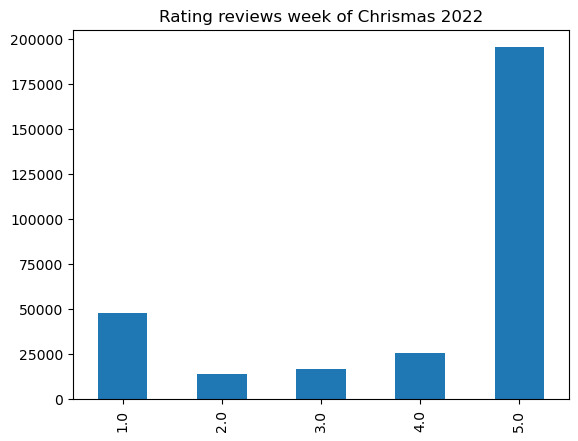

In [10]:
#Score Column evaluation ref one line pltot from: https://mode.com/python-tutorial/counting-and-plotting-in-python
sorted_df_2022['rating'].value_counts().sort_index().plot(kind='bar', title='Rating reviews week of Chrismas 2022')

### Step 5 Load nltk dependencies

In [12]:
#Load Dependencies
import nltk
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 6 Vader Sentiment Analyis

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyizer_object = SentimentIntensityAnalyzer()

### Step 7 Sample test to ensure sentiment analysis matches the text

In [16]:
pd.set_option('display.max_colwidth', None)

#Grab sample text
sample_text = sorted_df_2022['text'].sample(n=1).iloc[0]
#Get Sent Score
score_sent = sentiment_analyizer_object.polarity_scores(sample_text)
print(sample_text+'\n')
print(score_sent)


Fit perfectly as expected and water tastes wonderful.  Did have a lot of fine dust exit when first installed, recommend the ice maker be off for a few days or next few batches of ice be tossed.

{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9287}


In [17]:
sorted_df_2022

,rating,text,asin,timestamp,parent_asin,title,main_category,date
19729,5.0,Perfect for my cooler when we are camper. I'm no longer concerned about broken eggs.,B0B9J6P1PQ,2022-12-31 20:03:13.772,B0B9J4TVR8,"Cq acrylic 4 PACK Egg Holder for Refrigerator,Clear Plastic Egg Storage Container Organizer Bin,Large Capacity Stackable Deviled Egg Tray With LId and Handle for Fridge,Home Egg Fresh Storage Box",Appliances,12-31-2022
24006,5.0,"I live with other roommates, and we are all super busy on our own schedules. This has become a game changer for us in the kitchen. SO easy to stick on, SO simple, and SO efficient. Definitely worth it.",B078MMXJPC,2022-12-31 08:16:55.357,B081K4Q6KQ,Cimkiz Dishwasher Magnet Clean Dirty Sign Shutter Only Changes When You Push It Non-Scratching Strong Magnet or 3M Adhesive Options Indicator Tells Whether Dishes Are Clean or Dirty (Silver),Amazon Home,12-31-2022
244258,3.0,Not initially impressed with the quality or sturdiness of this item. Seems really flimsy but does hold a lot of eggs which is a plus. I loaded the container with the eggs I had on hand but it was. very unsteady moving the container to the fridge. I am not sure of how long this will last.,B0BCFGDKZQ,2022-12-31 06:22:25.629,B0BCFGDKZQ,"Raweao Large Capacity Egg Holder For Refrigerator - 40 Egg Fridge Organizers Holder, 2 Layers Folding Egg Storage Container for Refrigerator, Egg Holder & Egg Tray",Tools & Home Improvement,12-31-2022
132546,4.0,I can't tell what is. Not a good picture of it.,B07C1CCD2S,2022-12-31 20:11:02.525,B07C1C5Y5P,"Lifetime Appliance Parts Upgraded Single Door Handle Compatible with Frigidaire Refrigerator - 5304506469, 5304504507, 5304486359, 242059501, 242059504 (Slope Left)",Tools & Home Improvement,12-31-2022
253856,5.0,So far so good. Can be extremely difficult to remove the old bearings. Please take that into consideration before you jump into this repair. Getting the old bearings out can be very difficult to remove. Put these bearings in the freezer before installing to make the installation a little easier. I would have rated the durability higher but only time will tell. They seem to be decent quality bearings.,B07DMMB9R7,2022-12-31 19:21:40.948,B07DMMB9R7,#3 LG & Kenmore Washer NACHI Best Premium Bearings & OEM Seal KIT MDS62058301 4280EN4001F 4280EN4001G Front Load C,Industrial & Scientific,12-31-2022
...,...,...,...,...,...,...,...,...
17257,5.0,Fácil de limpiar y muy resistente,B09G76121T,2022-01-01 16:03:15.930,B09G76121T,"Skywin Stovetop Cover - Spill Guard Gas Range Protector, Custom Fit Protective Stove Liner for Samsung Gas Range",Tools & Home Improvement,01-01-2022
75057,5.0,Just what my dryer needed to keep on running!,B0826N5X4Y,2022-01-01 03:31:21.698,B0826N5X4Y,"Upgraded Dryer Repair Kit dryer roller kit for LG Kenmore Dryers Includes 4581EL2002C Dryer Drum Roller Assembly 4400EL2001A Dryer Belt and 4561EL3002A Dryer Idler Pulley, Pictures 6, 7 are Fit Models",Industrial & Scientific,01-01-2022
216468,5.0,Worked flawlessly on my Kenmore fridge - install was easy and straightforward - we have ice again!,B088LR8M5S,2022-01-01 20:15:24.885,B088LR8M5S,ForeverPRO 4317943 Whirlpool Icemaker Kit for Whirlpool Refrigerator 1857 4210317 4211173 4317943,Tools & Home Improvement,01-01-2022
74922,5.0,The filters were so easy to install and a great price,B01CA411SI,2022-01-01 13:41:38.438,B01CA410KW,"Waterdrop 5231JA2002A Refrigerator Water Filter, Replacement for LG® LT500P®, GEN11042FR-08, ADQ72910911, ADQ72910901, Kenmore 9890, 46-9890, LFX25974ST, LMX25964ST, Pack of 2",Tools & Home Improvement,01-01-2022


### Step 8 For loop to run sentiment analysis and save in a new res dictionary

In [19]:
### Run the polarity score on the entire dataset

sorted_df_2022['text'] = sorted_df_2022['text'].astype(str)

res = {}
#Appliyng for loop through dictionairy for the plarity scores
#https://www.nltk.org/howto/sentiment.html
for i, row in tqdm(sorted_df_2022.iterrows(), total=len(sorted_df_2022)):
    text = row['text']
    #print(text)
    res[i] = sentiment_analyizer_object.polarity_scores(text)

  0%|          | 0/299487 [00:00<?, ?it/s]

### Step 9 Save dictionary into a dataframe and print it out

In [21]:
vaders_christmas_2022 = pd.DataFrame(res).T
vaders_christmas_2022

,neg,neu,pos,compound
19729,0.252,0.571,0.176,-0.1531
24006,0.000,0.638,0.362,0.9593
244258,0.073,0.852,0.075,0.2686
132546,0.231,0.769,0.000,-0.3412
253856,0.053,0.864,0.083,0.2837
...,...,...,...,...
17257,0.000,1.000,0.000,0.0000
75057,0.000,1.000,0.000,0.0000
216468,0.000,0.723,0.277,0.6114
74922,0.000,0.505,0.495,0.8334


### Step 10 Merge the vader dataset with Neg/Neu/Pos compound fields with the original 2022 sorted data set

In [23]:
#Flip the dataframe
vaders_christmas_2022 = pd.DataFrame(res).T
#Merge the vader and sorted dataframe based on the index
merged_christmas_2022 = pd.merge(vaders_christmas_2022, sorted_df_2022, left_index=True, right_index=True)

In [24]:
merged_christmas_2022

,neg,neu,pos,compound,rating,text,asin,timestamp,parent_asin,title,main_category,date
19729,0.252,0.571,0.176,-0.1531,5.0,Perfect for my cooler when we are camper. I'm no longer concerned about broken eggs.,B0B9J6P1PQ,2022-12-31 20:03:13.772,B0B9J4TVR8,"Cq acrylic 4 PACK Egg Holder for Refrigerator,Clear Plastic Egg Storage Container Organizer Bin,Large Capacity Stackable Deviled Egg Tray With LId and Handle for Fridge,Home Egg Fresh Storage Box",Appliances,12-31-2022
24006,0.000,0.638,0.362,0.9593,5.0,"I live with other roommates, and we are all super busy on our own schedules. This has become a game changer for us in the kitchen. SO easy to stick on, SO simple, and SO efficient. Definitely worth it.",B078MMXJPC,2022-12-31 08:16:55.357,B081K4Q6KQ,Cimkiz Dishwasher Magnet Clean Dirty Sign Shutter Only Changes When You Push It Non-Scratching Strong Magnet or 3M Adhesive Options Indicator Tells Whether Dishes Are Clean or Dirty (Silver),Amazon Home,12-31-2022
244258,0.073,0.852,0.075,0.2686,3.0,Not initially impressed with the quality or sturdiness of this item. Seems really flimsy but does hold a lot of eggs which is a plus. I loaded the container with the eggs I had on hand but it was. very unsteady moving the container to the fridge. I am not sure of how long this will last.,B0BCFGDKZQ,2022-12-31 06:22:25.629,B0BCFGDKZQ,"Raweao Large Capacity Egg Holder For Refrigerator - 40 Egg Fridge Organizers Holder, 2 Layers Folding Egg Storage Container for Refrigerator, Egg Holder & Egg Tray",Tools & Home Improvement,12-31-2022
132546,0.231,0.769,0.000,-0.3412,4.0,I can't tell what is. Not a good picture of it.,B07C1CCD2S,2022-12-31 20:11:02.525,B07C1C5Y5P,"Lifetime Appliance Parts Upgraded Single Door Handle Compatible with Frigidaire Refrigerator - 5304506469, 5304504507, 5304486359, 242059501, 242059504 (Slope Left)",Tools & Home Improvement,12-31-2022
253856,0.053,0.864,0.083,0.2837,5.0,So far so good. Can be extremely difficult to remove the old bearings. Please take that into consideration before you jump into this repair. Getting the old bearings out can be very difficult to remove. Put these bearings in the freezer before installing to make the installation a little easier. I would have rated the durability higher but only time will tell. They seem to be decent quality bearings.,B07DMMB9R7,2022-12-31 19:21:40.948,B07DMMB9R7,#3 LG & Kenmore Washer NACHI Best Premium Bearings & OEM Seal KIT MDS62058301 4280EN4001F 4280EN4001G Front Load C,Industrial & Scientific,12-31-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
17257,0.000,1.000,0.000,0.0000,5.0,Fácil de limpiar y muy resistente,B09G76121T,2022-01-01 16:03:15.930,B09G76121T,"Skywin Stovetop Cover - Spill Guard Gas Range Protector, Custom Fit Protective Stove Liner for Samsung Gas Range",Tools & Home Improvement,01-01-2022
75057,0.000,1.000,0.000,0.0000,5.0,Just what my dryer needed to keep on running!,B0826N5X4Y,2022-01-01 03:31:21.698,B0826N5X4Y,"Upgraded Dryer Repair Kit dryer roller kit for LG Kenmore Dryers Includes 4581EL2002C Dryer Drum Roller Assembly 4400EL2001A Dryer Belt and 4561EL3002A Dryer Idler Pulley, Pictures 6, 7 are Fit Models",Industrial & Scientific,01-01-2022
216468,0.000,0.723,0.277,0.6114,5.0,Worked flawlessly on my Kenmore fridge - install was easy and straightforward - we have ice again!,B088LR8M5S,2022-01-01 20:15:24.885,B088LR8M5S,ForeverPRO 4317943 Whirlpool Icemaker Kit for Whirlpool Refrigerator 1857 4210317 4211173 4317943,Tools & Home Improvement,01-01-2022
74922,0.000,0.505,0.495,0.8334,5.0,The filters were so easy to install and a great price,B01CA411SI,2022-01-01 13:41:38.438,B01CA410KW,"Waterdrop 5231JA2002A Refrigerator Water Filter, Replacement for LG® LT500P®, GEN11042FR-08, ADQ72910911, ADQ72910901, Kenmore 9890, 46-9890, LFX25974ST, LMX25964ST, Pack of 2",Tools & Home Improvement,01-01-2022


### Step 11 Plot vader compound score vs the rating

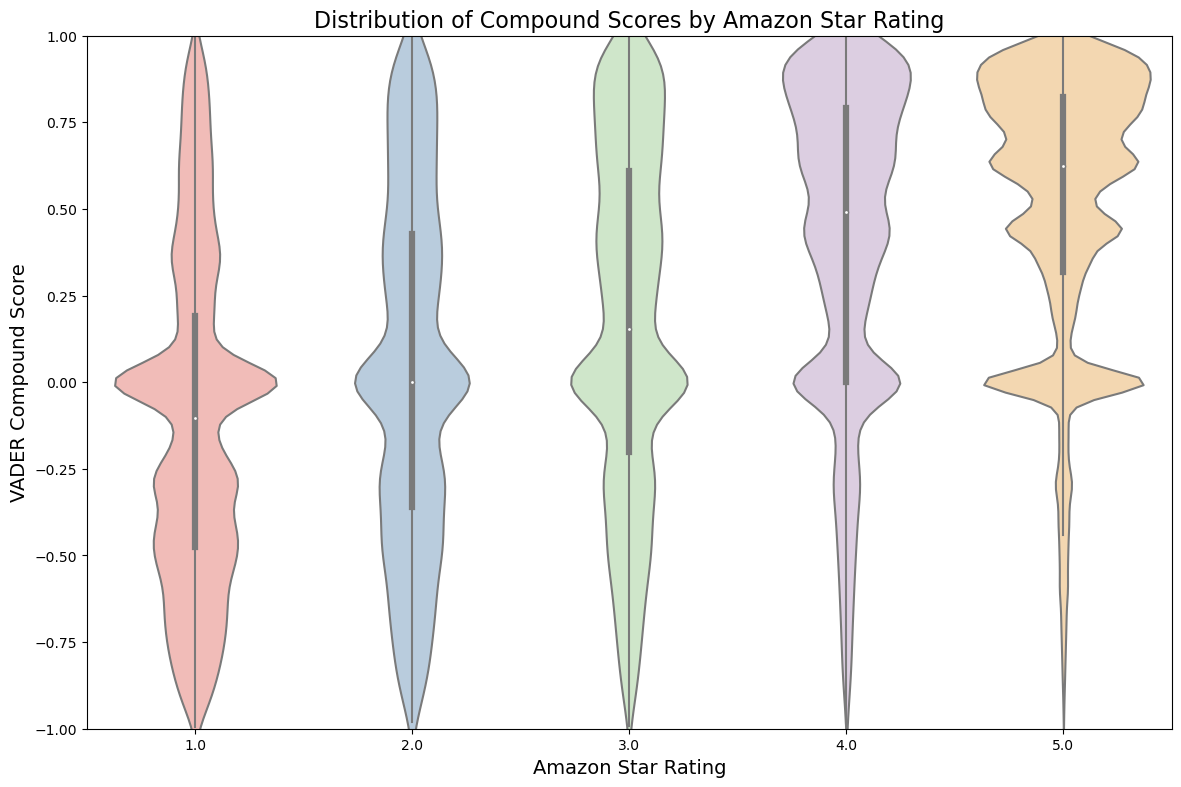

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 9))
#https://seaborn.pydata.org/generated/seaborn.violinplot.html#
sns.violinplot(data=merged_christmas_2022, x='rating', y='compound', palette='Pastel1')
plt.title('Distribution of Compound Scores by Amazon Star Rating', fontsize=16)
plt.xlabel('Amazon Star Rating', fontsize=14)
plt.ylabel('VADER Compound Score', fontsize=14)
plt.ylim(-1, 1)
plt.show()
